### Continuous uniform proposal distribution form phases
The proposal distributions for the phases is uniform[0,180]. While the mcmc chain does eventually converge to the true value, it takes 2 orders of magnitudes longer than if the proposal distribution for the phases are discreteUniform[0, 180]. In this case, the true value involves more terms and the intial value is far away. Therefore it takes the sampler even longer to converge. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pymc import MCMC
import seaborn
import numpy as np
from parmed.topologyobjects import DihedralType
from simtk import unit
from torsionfit.toy_model import ToyModel
import torsionfit.backends.sqlite_plus as db

In [2]:
toy = ToyModel(n_increments=18, sample_phase=True, continuous=True)

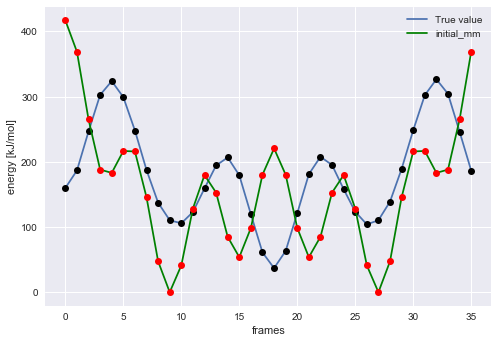

In [3]:
plt.plot(toy.synthetic_energy, label='True value')
plt.plot(toy.synthetic_energy, 'ko')
plt.xlabel('frames')
plt.ylabel('energy [kJ/mol]')
plt.plot(toy.scan_set.mm_energy, color='g', label='initial_mm')
plt.plot(toy.scan_set.initial_mm, 'ko', color='r')
plt.legend()

In [4]:
# sample
sampler = MCMC(toy.model.pymc_parameters, db=db, dbname='continuous_rj_randomized.sqlite')
sampler.sample(iter=10000)

 [-----------------100%-----------------] 10000 of 10000 complete in 473.1 sec

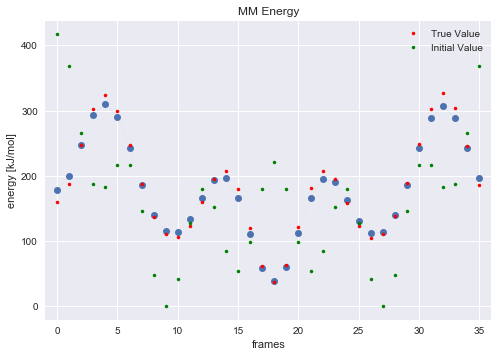

In [5]:
seaborn.tsplot(sampler.trace('mm_energy')[:], interpolate=False)
plt.plot(toy.synthetic_energy, '.', color='r', label='True Value')
plt.title('MM Energy')
plt.xlabel('frames')
plt.ylabel('energy [kJ/mol]')
#plt.plot(sampler.trace('mm_energy')[0])
plt.plot(toy.scan_set.initial_mm, '.', color='g', label='Initial Value')
plt.legend()
plt.savefig('energy_fit_cont_rj_randomized.pdf')

In [7]:
import pymbar.timeseries as ts
[t, g, N_eff] = ts.detectEquilibration(sampler.trace('sigma')[:])
print('Start of equilibrated data: {}'.format(t))

Start of equilibrated data: 6430


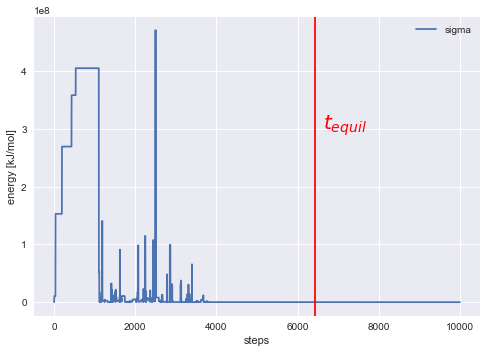

In [35]:
plt.plot(np.exp(sampler.trace('sigma')[:]), label='sigma')
plt.axvline(t, color='red', ymin=0)
plt.text(t+200,300000000,r'$t_{equil}$', rotation=0, color='red', fontsize=20)
plt.legend()
plt.xlabel('steps')
plt.ylabel('energy [kJ/mol]')
plt.savefig('sigma_continous_rj_randomized.pdf')

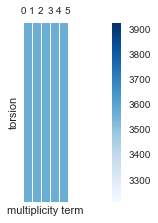

In [10]:
import torsionfit.plots as plots
plots.marg_mult(toy.model, sampler, 10000, t)
plt.savefig('multiplicity_continous_rj_randomized.pdf')

In [9]:
toy.true_value

<DihedralTypes [<DihedralType; phi_k=3.586, per=6, phase=180.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=18.864, per=4, phase=180.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=2.183, per=3, phase=180.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=17.008, per=1, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=2.150, per=2, phase=0.000,  scee=1.000, scnb=1.000>]>

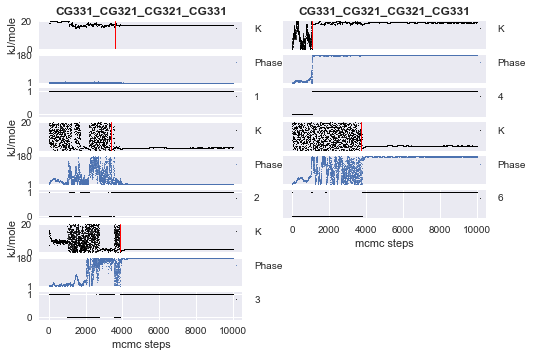

In [11]:
plots.trace_plots('CG331_CG321_CG321_CG331', sampler, markersize=2.0, continuous=True, 
                  filename='traces_cont_rj_randomized.pdf')

In [12]:
toy.initial_value


<DihedralTypes [<DihedralType; phi_k=18.536, per=1, phase=180.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=19.270, per=2, phase=180.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=4.942, per=3, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=18.822, per=6, phase=0.000,  scee=1.000, scnb=1.000>]>